# Task C

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Exploring the DFT Matrix vs. Random Matrices**

The *Discrete Fourier Transform (DFT) matrix* of size \(N \times N\) is defined as:

$$
F_{m,n} \;=\; \frac{1}{\sqrt{N}}\;\exp\!\left(-\mathrm{j}\,\frac{2\pi m n}{N}\right),
\qquad 0 \le m,n < N.
$$

Unlike a random matrix, the DFT matrix possesses remarkable *algebraic* and *geometric* properties that make it a cornerstone of signal processing, linear algebra, and applied mathematics.


In [35]:
def compute_Fourier_Series(x, t, K):

    x = np.asarray(x)
    N = len(x)
    t = np.arange(N)

    if N == 0:
        return np.array([])

    k0 = - (K // 2)
    k = np.arange(k0, k0 + K)

    # DFT formula: c_k = (1/N) * sum_{n=0}^{N-1} x[n] * exp(-j * 2 * pi * k * n / N)
    c = np.zeros(K, dtype=complex)
    for i, freq in enumerate(k):
        c[i] = (1/N) * np.sum(x * np.exp(-1j * 2.0 * np.pi * freq * t / N))

    return c



In [36]:
def reconstruct_signal(fourier_coeffs, t):
    """Reconstructs a signal from its Fourier coefficients."""
    N = len(t)
    K = len(fourier_coeffs)
    k0 = -(K // 2)
    k = np.arange(k0, k0 + K)

    # Inverse DFT formula: x[n] = sum_{k} c_k * exp(j * 2 * pi * k * n / N)
    reconstructed_x = np.zeros(N, dtype=complex)
    for i, time in enumerate(t):
        reconstructed_x[i] = np.sum(fourier_coeffs * np.exp(1j * 2.0 * np.pi * k * time / N))

    return reconstructed_x.real

In [37]:
N = 64
t = np.arange(N)
x = np.sin(2 * np.pi * t / 8) + 0.5 * np.sin(2 * np.pi * t / 16)



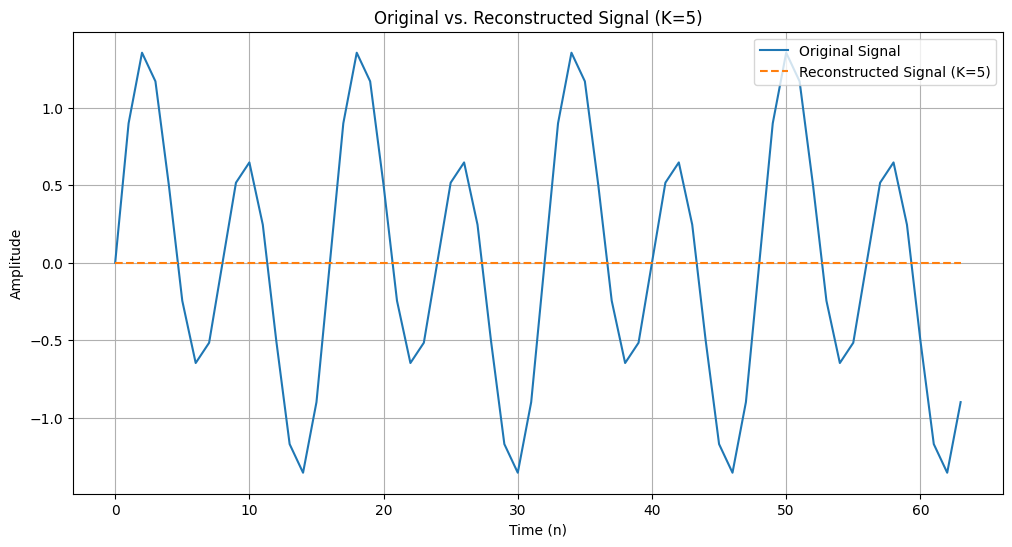

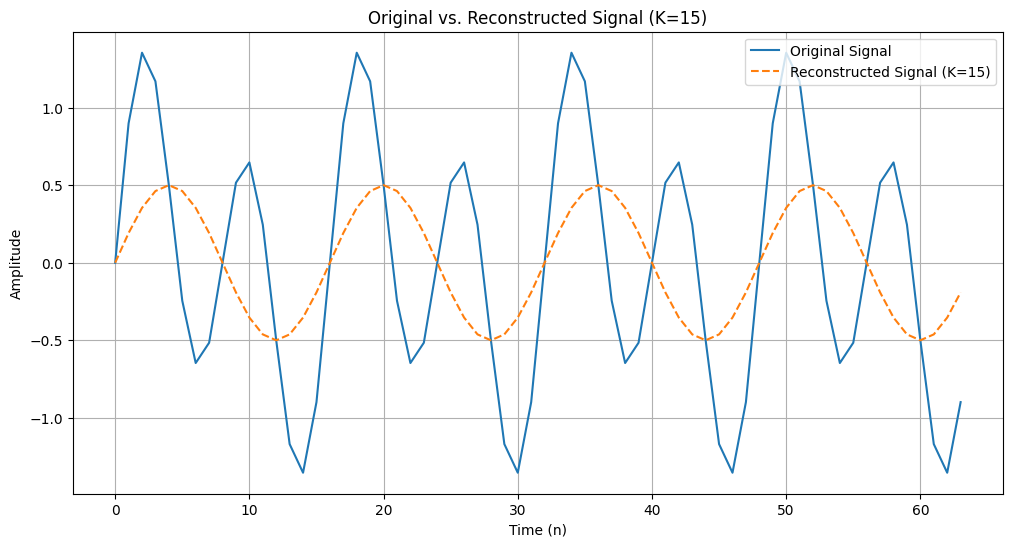

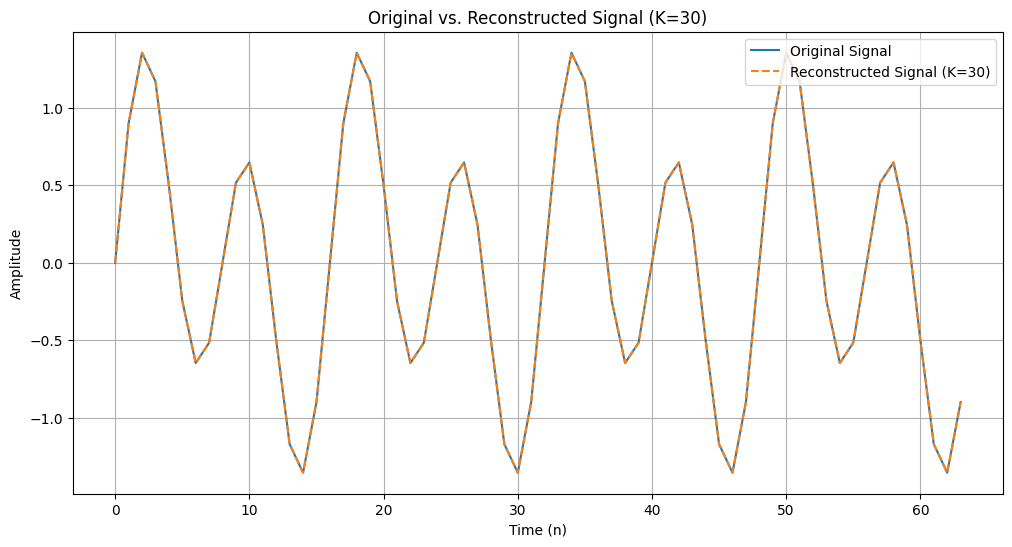

In [38]:
K_values = [5, 15, 30]

for K in K_values:
    fourier_coeffs = compute_Fourier_Series(x, t, K)
    reconstructed_x = reconstruct_signal(fourier_coeffs, t)

    plt.figure(figsize=(12, 6))
    plt.plot(t, x, label='Original Signal')
    plt.plot(t, reconstructed_x, label=f'Reconstructed Signal (K={K})', linestyle='--')
    plt.xlabel('Time (n)')
    plt.ylabel('Amplitude')
    plt.title(f'Original vs. Reconstructed Signal (K={K})')
    plt.legend()
    plt.grid(True)
    plt.show()

# (a) Structure and Visualization Construct the DFT matrix F for N = 16. Compare it with an 16 × 16 random matrix R whose entries are drawn i.i.d. from N(0,1).


In [39]:
N = 16
dft_matrix = np.zeros((N, N), dtype=complex)

for m in range(N):
    for n in range(N):
        dft_matrix[m, n] = (1 / np.sqrt(N)) * np.exp(-1j * 2 * np.pi * m * n / N)

print("DFT Matrix (N=16):")
print(dft_matrix)

random_matrix = np.random.randn(N, N) + 1j * np.random.randn(N, N)

print("\nRandom Matrix (N=16):")
print(random_matrix)

DFT Matrix (N=16):
[[ 2.50000000e-01+0.00000000e+00j  2.50000000e-01+0.00000000e+00j
   2.50000000e-01+0.00000000e+00j  2.50000000e-01+0.00000000e+00j
   2.50000000e-01+0.00000000e+00j  2.50000000e-01+0.00000000e+00j
   2.50000000e-01+0.00000000e+00j  2.50000000e-01+0.00000000e+00j
   2.50000000e-01+0.00000000e+00j  2.50000000e-01+0.00000000e+00j
   2.50000000e-01+0.00000000e+00j  2.50000000e-01+0.00000000e+00j
   2.50000000e-01+0.00000000e+00j  2.50000000e-01+0.00000000e+00j
   2.50000000e-01+0.00000000e+00j  2.50000000e-01+0.00000000e+00j]
 [ 2.50000000e-01+0.00000000e+00j  2.30969883e-01-9.56708581e-02j
   1.76776695e-01-1.76776695e-01j  9.56708581e-02-2.30969883e-01j
   1.53080850e-17-2.50000000e-01j -9.56708581e-02-2.30969883e-01j
  -1.76776695e-01-1.76776695e-01j -2.30969883e-01-9.56708581e-02j
  -2.50000000e-01-3.06161700e-17j -2.30969883e-01+9.56708581e-02j
  -1.76776695e-01+1.76776695e-01j -9.56708581e-02+2.30969883e-01j
  -4.59242550e-17+2.50000000e-01j  9.56708581e-02+2.3096

 **• Visualize both matrices using heatmaps (real and imaginary parts separately).**

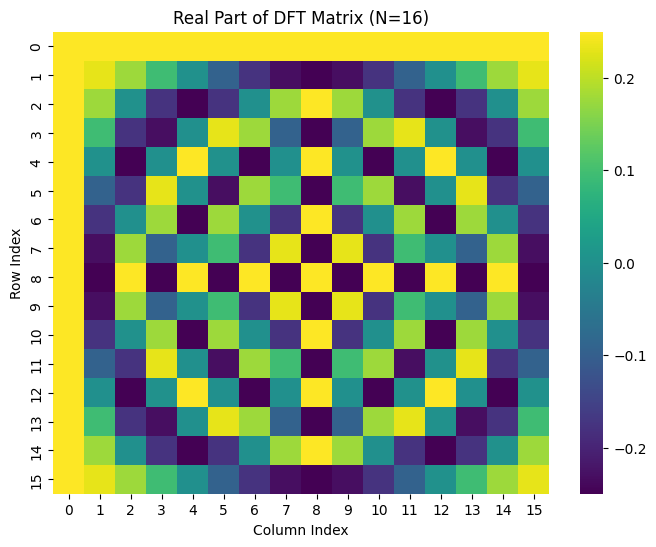

In [40]:
# Visualize the real part of the DFT matrix
plt.figure(figsize=(8, 6))
sns.heatmap(dft_matrix.real, cmap='viridis')
plt.title('Real Part of DFT Matrix (N=16)')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.show()

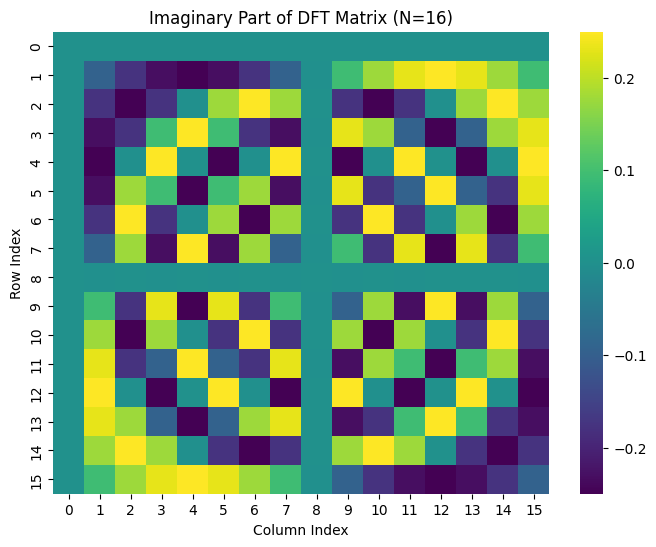

In [41]:
# Visualize the imaginary part of the DFT matrix
plt.figure(figsize=(8, 6))
sns.heatmap(dft_matrix.imag, cmap='viridis')
plt.title('Imaginary Part of DFT Matrix (N=16)')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.show()

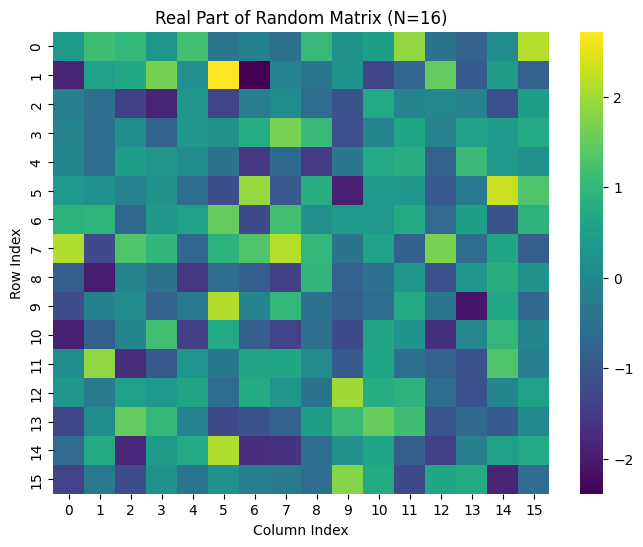

In [42]:
# Visualize the real part of the Random matrix
plt.figure(figsize=(8, 6))
sns.heatmap(random_matrix.real, cmap='viridis')
plt.title('Real Part of Random Matrix (N=16)')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.show()

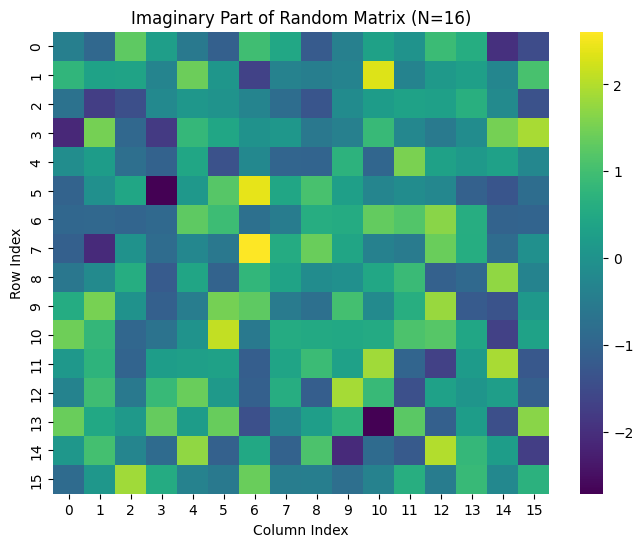

In [43]:
# Visualize the imaginary part of the Random matrix
plt.figure(figsize=(8, 6))
sns.heatmap(random_matrix.imag, cmap='viridis')
plt.title('Imaginary Part of Random Matrix (N=16)')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.show()

 **• Comment on differences in structure: symmetry, periodicity, and patterns.**

Based on the heatmaps, we can observe significant differences in the structure of the DFT matrix compared to the random matrix:
<br>
<br>
**Symmetry and Periodicity:** The DFT matrix exhibits clear patterns, including symmetries and periodic structures in both its real and imaginary parts. This is a direct consequence of its definition based on complex exponentials. The patterns repeat across rows and columns.
<br>
<br>
**Patterns:** The DFT matrix shows organized and predictable variations in color (representing the values). You can see blocks of similar values and repeating arrangements.
<br>
<br>
**Randomness:** The random matrix, as expected, shows no discernible symmetry or periodicity. The colors in the heatmap appear randomly distributed, reflecting the independent and identically distributed nature of the entries.
<br>
<br>
These structural differences highlight the fundamental difference between a deterministic, algebraically defined matrix like the DFT matrix and a matrix whose entries are drawn from a probability distribution. The structured nature of the DFT matrix is what gives it its powerful properties for signal processing and analysis.

 # (b) Orthogonality and Energy Preservation


 **• Verify numerically that F∗F = I, i.e., the DFT matrix is unitary.**


Product of DFT matrix and its conjugate transpose (F*F):
[[ 1.00000000e+00+0.00000000e+00j -3.46944695e-17-6.93889390e-18j
  -3.46944695e-17-3.46944695e-17j -7.28583860e-17+6.93889390e-18j
  -3.83533332e-16+4.16333634e-17j -1.42247325e-16-1.24900090e-16j
  -2.56739074e-16-3.46944695e-17j  1.80411242e-16-1.97758476e-16j
   0.00000000e+00+2.83276945e-16j  0.00000000e+00+4.02455846e-16j
  -2.08166817e-17+3.40005801e-16j  2.08166817e-16+2.91433544e-16j
  -5.84123479e-16+8.32667268e-17j -3.01841885e-16+6.93889390e-17j
   5.62050406e-16+8.32667268e-17j  1.76247905e-15+5.10008702e-16j]
 [-3.46944695e-17+6.93889390e-18j  1.00000000e+00+4.30974584e-18j
  -9.67565557e-17-4.47538365e-17j  5.04398615e-17+5.63880071e-17j
  -1.17961196e-16-1.75476763e-16j  8.30797204e-17-4.41772988e-17j
  -7.31102013e-17-2.47319482e-16j -8.63534781e-17-1.77782093e-16j
  -1.01153345e-16+9.02056208e-17j -1.19834486e-17+1.28632160e-17j
  -1.71030634e-16+2.01518724e-16j  1.34390162e-16+3.06238003e-16j
   1.80411242e-16-

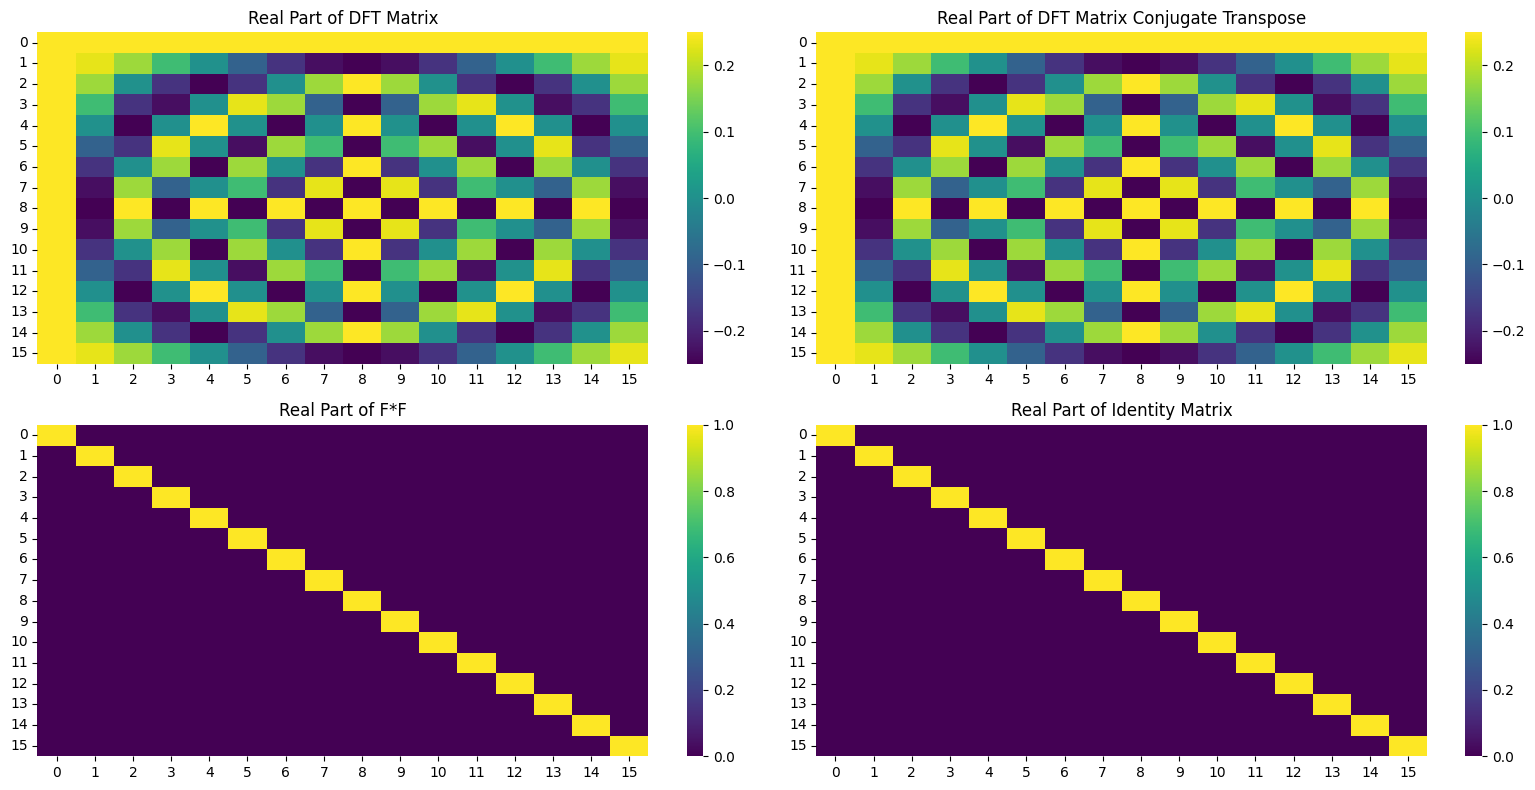

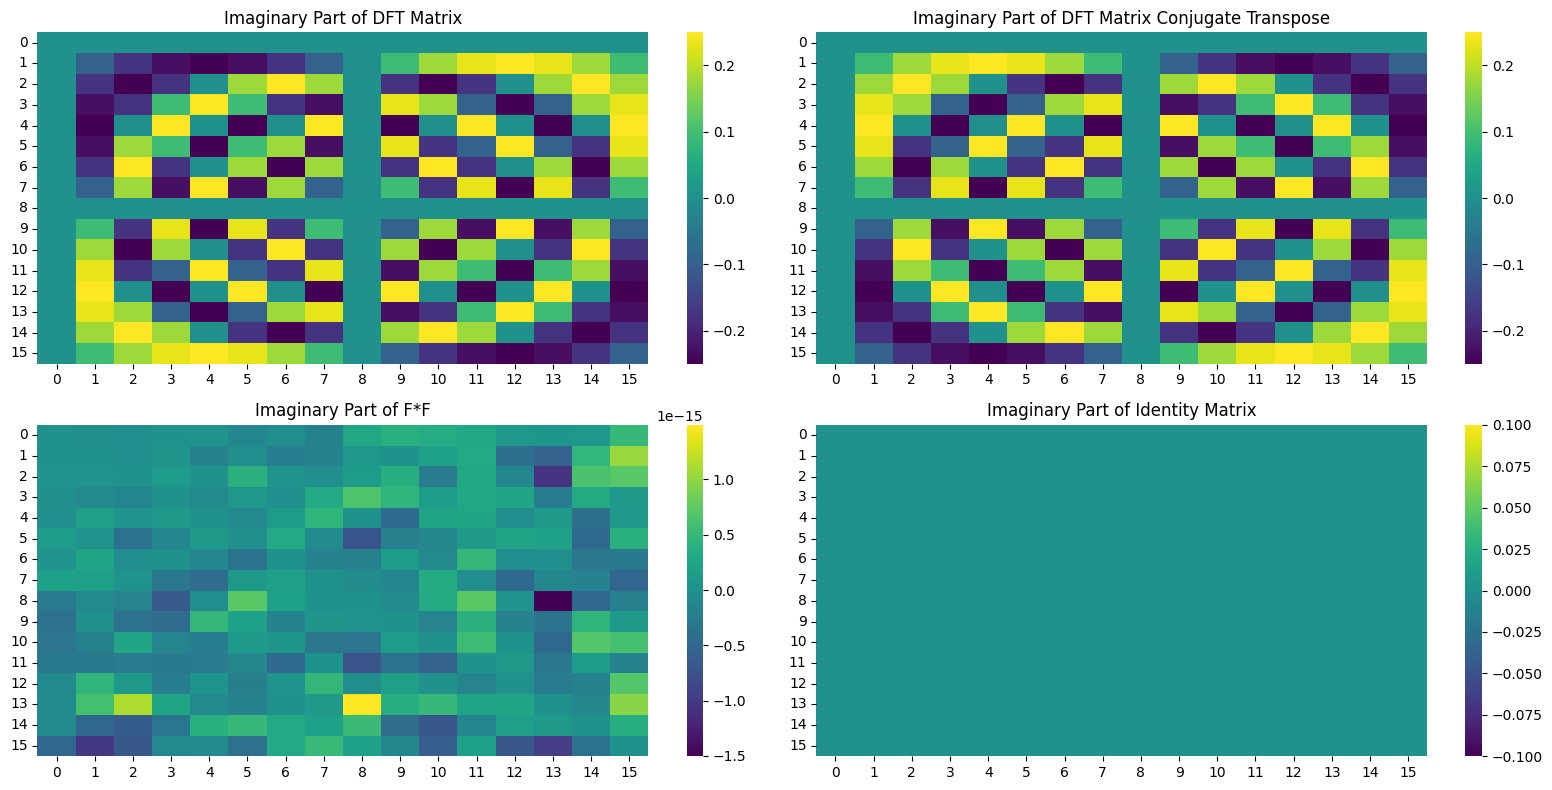

In [44]:
dft_matrix_conj_transpose = np.conj(dft_matrix.T)

product = dft_matrix @ dft_matrix_conj_transpose

identity_matrix = np.eye(N)

# Check if the product is close to the identity matrix (allowing for floating-point inaccuracies)
is_unitary = np.allclose(product, identity_matrix)

print("Product of DFT matrix and its conjugate transpose (F*F):")
print(product)
print("\nIs the DFT matrix unitary (F*F ≈ I)?")
print(is_unitary)

plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
sns.heatmap(dft_matrix.real, cmap='viridis')
plt.title('Real Part of DFT Matrix')

plt.subplot(2, 2, 2)
sns.heatmap(dft_matrix_conj_transpose.real, cmap='viridis')
plt.title('Real Part of DFT Matrix Conjugate Transpose')

plt.subplot(2, 2, 3)
sns.heatmap(product.real, cmap='viridis')
plt.title('Real Part of F*F')

plt.subplot(2, 2, 4)
sns.heatmap(identity_matrix.real, cmap='viridis')
plt.title('Real Part of Identity Matrix')

plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
sns.heatmap(dft_matrix.imag, cmap='viridis')
plt.title('Imaginary Part of DFT Matrix')

plt.subplot(2, 2, 2)
sns.heatmap(dft_matrix_conj_transpose.imag, cmap='viridis')
plt.title('Imaginary Part of DFT Matrix Conjugate Transpose')

plt.subplot(2, 2, 3)
sns.heatmap(product.imag, cmap='viridis')
plt.title('Imaginary Part of F*F')

plt.subplot(2, 2, 4)
sns.heatmap(identity_matrix.imag, cmap='viridis')
plt.title('Imaginary Part of Identity Matrix')

plt.tight_layout()
plt.show()

 **• Compute R⊤R for the random matrix and comment on whether it approximates the identity.**


Product of Random matrix transpose and Random matrix (R^T * R):
[[ 4.71842545e+00-16.98722519j -3.16283470e+00 -7.9289575j
   2.36445506e+00 +0.68116995j -1.13253948e+01 +4.31593161j
   5.62269259e+00 -4.07011989j -1.07341446e+01 -3.06876879j
   2.19902377e+01 -0.36361987j  1.11203348e+01 -4.52662839j
   3.88847819e+00 -0.7407998j  -2.21039595e+00 +4.78457822j
   4.88238958e+00 -0.94842855j -1.83476905e+00 -5.64246094j
   5.67753492e+00 -0.78651839j  2.51157603e+00 -3.51980769j
   5.67856637e+00 +2.16673564j -9.81537906e-03-11.48934455j]
 [-3.16283470e+00 -7.9289575j  -3.55708233e+00 +4.28842408j
  -2.82856257e+00 -2.39245106j  1.35330286e+00 +4.62382452j
   3.68118843e+00 +1.71524297j -2.66110997e+00 +6.58711928j
   5.24346227e+00 -9.20745072j  1.44396907e+00 -4.53663406j
   5.50558201e-01 -1.3413933j   1.59824657e+00 -1.67088156j
  -1.39140935e-01 +3.11810628j  2.22697216e+00 -3.0108587j
   1.09337275e+00 -6.99353931j  2.50221991e-01 -0.66617672j
  -4.69461731e+00 +3.18516313j -2.426

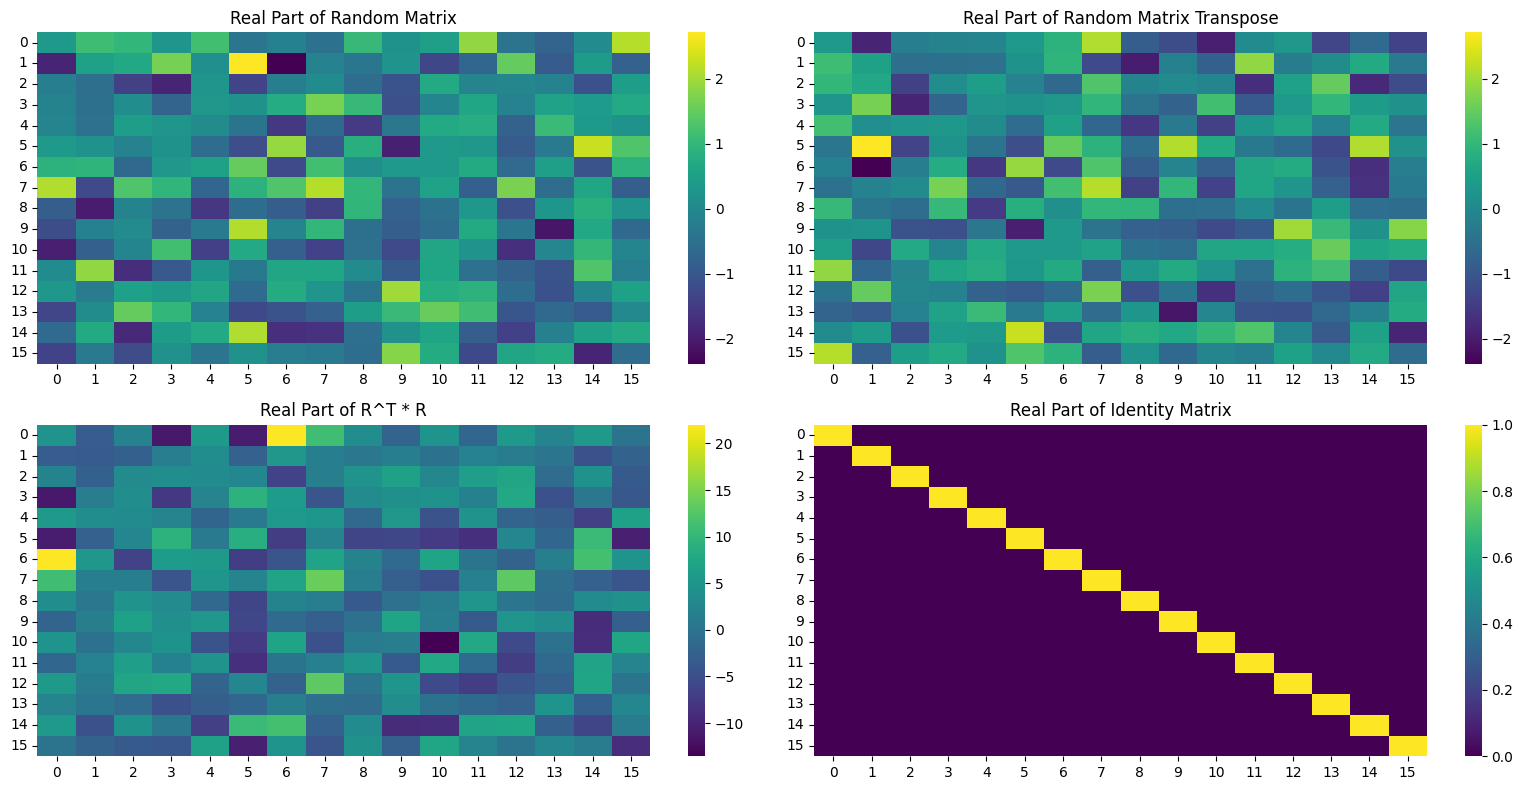

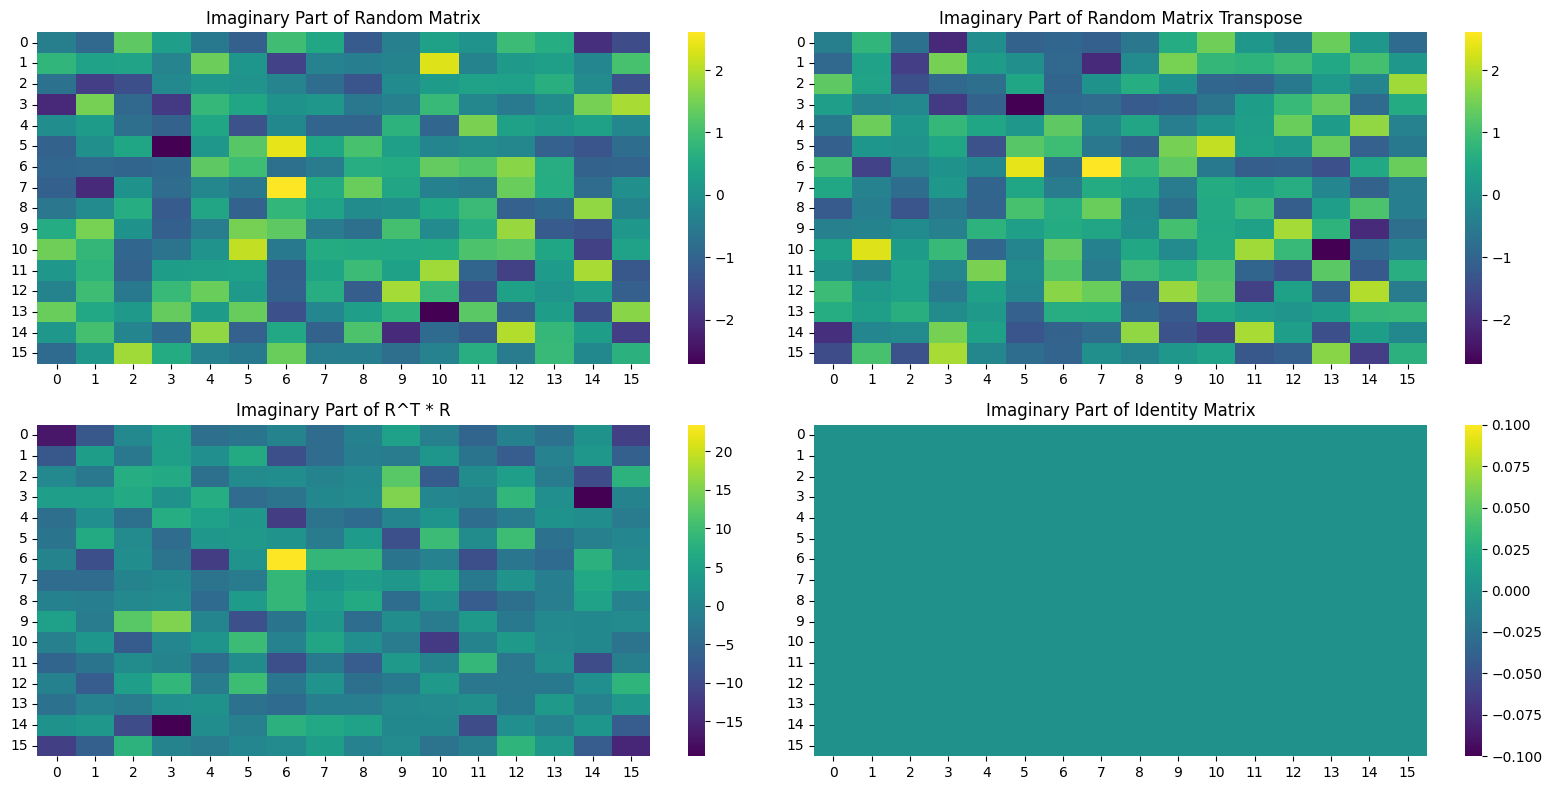

In [45]:
random_matrix_transpose = random_matrix.T
product_random = random_matrix_transpose @ random_matrix

print("Product of Random matrix transpose and Random matrix (R^T * R):")
print(product_random)

# Check if the product is close to the identity matrix
is_approx_identity = np.allclose(product_random, np.eye(N))

print("\nDoes R^T * R approximate the identity matrix?")
print(is_approx_identity)

plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
sns.heatmap(random_matrix.real, cmap='viridis')
plt.title('Real Part of Random Matrix')

plt.subplot(2, 2, 2)
sns.heatmap(random_matrix_transpose.real, cmap='viridis')
plt.title('Real Part of Random Matrix Transpose')

plt.subplot(2, 2, 3)
sns.heatmap(product_random.real, cmap='viridis')
plt.title('Real Part of R^T * R')

plt.subplot(2, 2, 4)
sns.heatmap(np.eye(N).real, cmap='viridis')
plt.title('Real Part of Identity Matrix')

plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
sns.heatmap(random_matrix.imag, cmap='viridis')
plt.title('Imaginary Part of Random Matrix')

plt.subplot(2, 2, 2)
sns.heatmap(random_matrix_transpose.imag, cmap='viridis')
plt.title('Imaginary Part of Random Matrix Transpose')

plt.subplot(2, 2, 3)
sns.heatmap(product_random.imag, cmap='viridis')
plt.title('Imaginary Part of R^T * R')

plt.subplot(2, 2, 4)
sns.heatmap(np.eye(N).imag, cmap='viridis')
plt.title('Imaginary Part of Identity Matrix')

plt.tight_layout()
plt.show()

 **• Explain why unitarity matters in signal processing (hint: energy preservation under transformation).**

Based on the computation of R^T * R for the random matrix, the result does **not** approximate the identity matrix. This is in contrast to the DFT matrix, which was shown to be unitary (F\*F ≈ I). This difference highlights the structured nature of the DFT matrix compared to the randomness of the random matrix.

**Why Unitarity Matters in Signal Processing: Energy Preservation**

The unitarity of the DFT matrix is a crucial property in signal processing, primarily because it ensures the **preservation of energy** under the transformation.

Mathematically, for a unitary matrix \(U\) and a vector \(x\), the Euclidean norm (or energy) of the transformed vector \(Ux\) is equal to the Euclidean norm of the original vector \(x\):

$$ \|Ux\|^2 = (Ux)^* (Ux) = x^* U^* U x = x^* I x = x^* x = \|x\|^2 $$

In signal processing terms, applying the DFT to a signal transforms it from the time domain to the frequency domain. The unitarity of the DFT matrix means that the total energy of the signal in the time domain is equal to the total energy of the signal in the frequency domain. This is a fundamental concept, as it implies that the DFT does not artificially amplify or attenuate the signal's energy; it merely redistributes it across different frequency components.
<br>
<br>
This energy preservation property is vital for various applications, including:

*   **Spectral Analysis:** Accurately determining the energy distribution across different frequencies.
*   **Filter Design:** Designing filters that manipulate the frequency content without distorting the overall signal energy.
*   **Compression:** Developing compression algorithms that preserve the essential information (energy) of the signal.
*   **Noise Reduction:** Analyzing and processing signals in the frequency domain while maintaining the signal's integrity.

In essence, the unitary nature of the DFT matrix provides a stable and reliable framework for analyzing and manipulating signals, ensuring that the transformation itself does not introduce unintended changes in the signal's energy content.

#  (c) Condition Number Exploration


The *condition number* of a matrix A is defined as:

$$
\kappa(A) = \|A\| \cdot \|A^{-1}\|
$$

which measures how sensitive the solution of the linear system \(Ax = b\) is to perturbations in the vector \(b\). A small condition number indicates that the matrix is well-conditioned, meaning that small changes in \(b\) lead to small changes in \(x\). Conversely, a large condition number indicates that the matrix is ill-conditioned, meaning that small changes in \(b\) can lead to large changes in \(x\).
<br>
<br>
For a unitary matrix \(U\), its condition number with respect to the 2-norm is always 1. This is because
  $$
  \|U\|_2 = 1  
  $$
  $$
   \|U^{-1}\|_2 = \|U^*\|_2 = 1.
  $$
  
  This property makes unitary matrices particularly well-suited for numerical computations.

Let's compute and compare the condition numbers of the DFT matrix and the random matrix we created earlier.

In [46]:
# Compute the condition number of the DFT matrix
dft_condition_number = np.linalg.cond(dft_matrix)
print(f"Condition Number of DFT Matrix (N={N}): {dft_condition_number}")

# Compute the condition number of the Random matrix
# For random matrices, especially complex ones, computing the inverse directly might be numerically unstable.
# We can compute the condition number directly using np.linalg.cond
random_condition_number = np.linalg.cond(random_matrix)
print(f"Condition Number of Random Matrix (N={N}): {random_condition_number}")

Condition Number of DFT Matrix (N=16): 1.000000000000001
Condition Number of Random Matrix (N=16): 20.71692148867967


**(i) For N = 2,4,8,16,32,64, construct FN and a random N ×N matrix RN (entries i.i.d. N(0,1)).**

In [47]:
N_values_explore = [2**i for i in range(1, 7)] # N = 2, 4, 8, 16, 32, 64

dft_matrices = {}
random_matrices = {}

for N_val in N_values_explore:
    # Construct the DFT matrix
    dft_matrix_N = np.zeros((N_val, N_val), dtype=complex)
    for m in range(N_val):
        for n in range(N_val):
            dft_matrix_N[m, n] = (1 / np.sqrt(N_val)) * np.exp(-1j * 2 * np.pi * m * n / N_val)
    dft_matrices[N_val] = dft_matrix_N

    # Construct a random matrix
    random_matrix_N = np.random.randn(N_val, N_val) + 1j * np.random.randn(N_val, N_val)
    random_matrices[N_val] = random_matrix_N

print("Constructed DFT and Random Matrices for various N values.")



Constructed DFT and Random Matrices for various N values.


Visualize the matrices using heatmaps

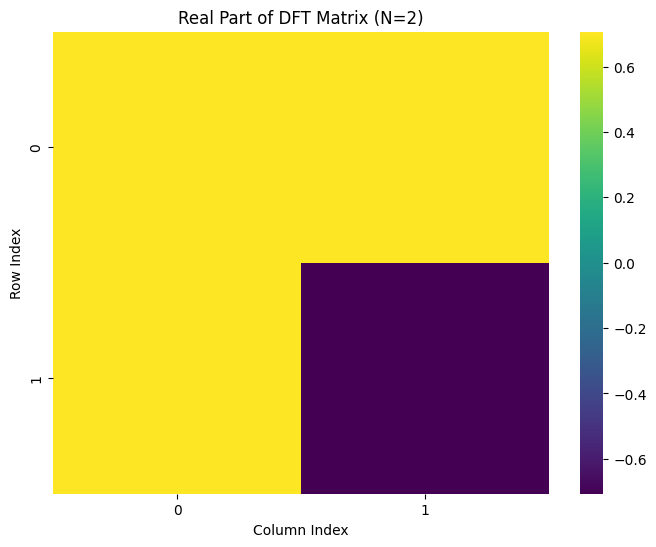

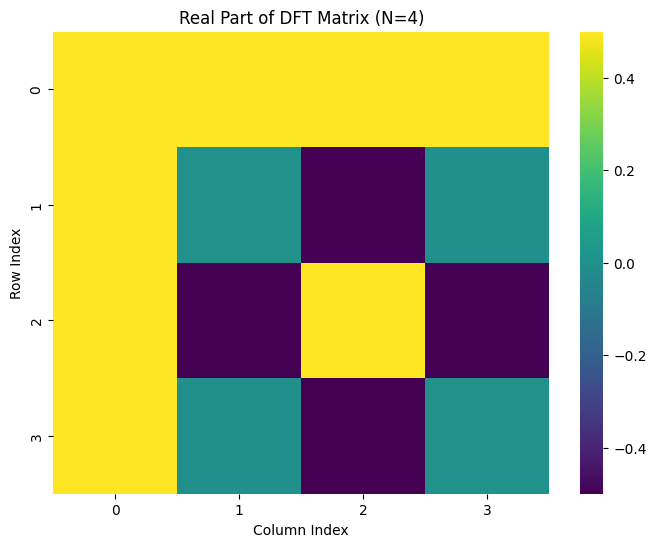

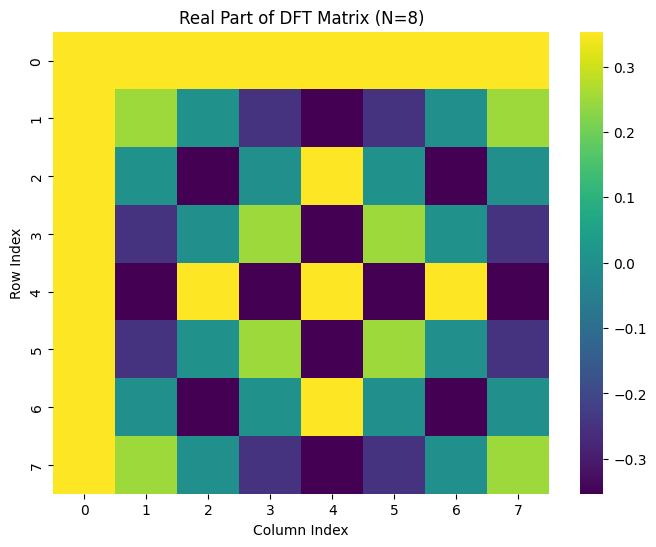

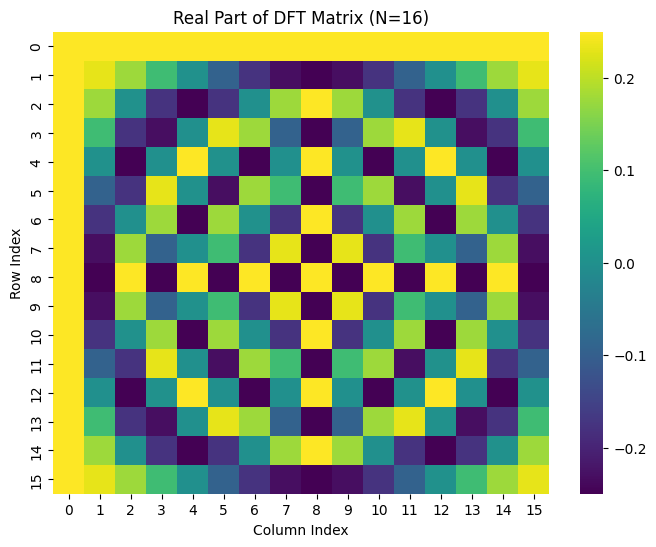

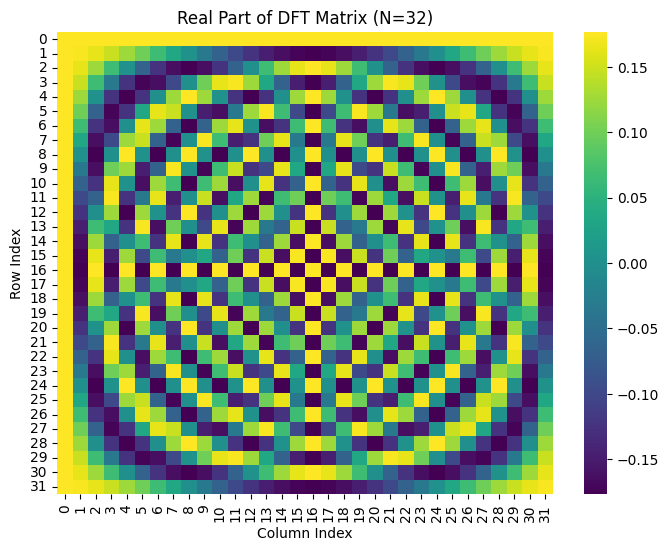

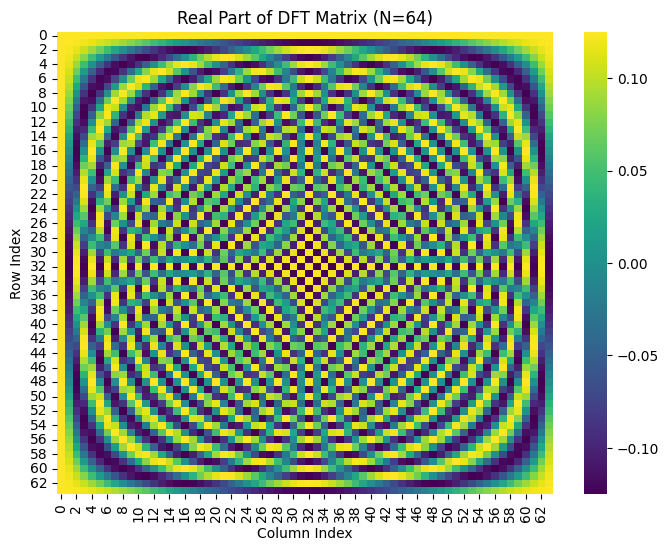

In [48]:
for N_val in N_values_explore:
    # Visualize the real part of the DFT matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(dft_matrices[N_val].real, cmap='viridis')
    plt.title(f'Real Part of DFT Matrix (N={N_val})')
    plt.xlabel('Column Index')
    plt.ylabel('Row Index')
    plt.show()



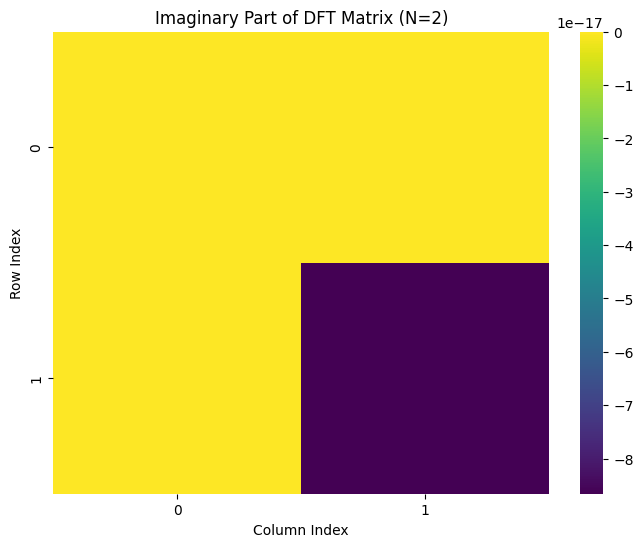

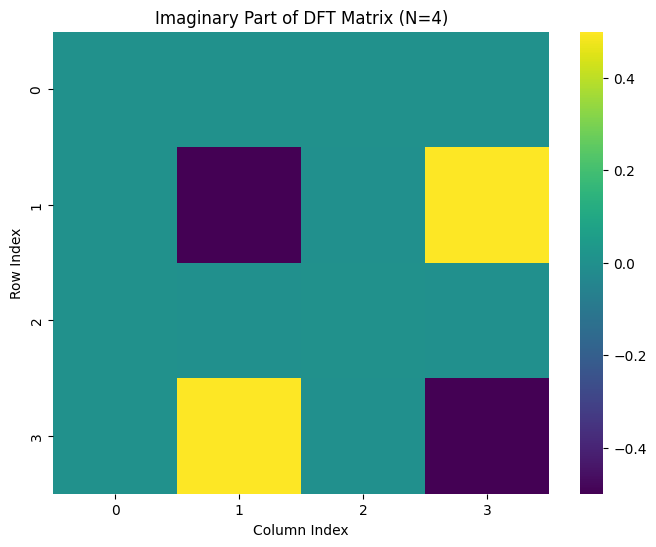

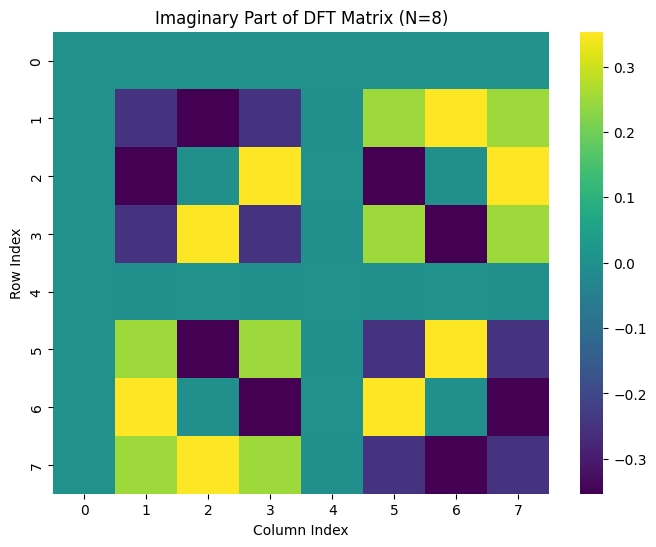

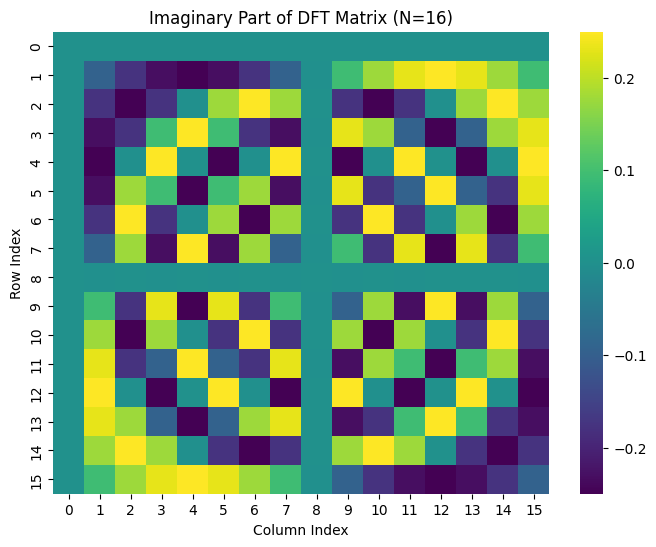

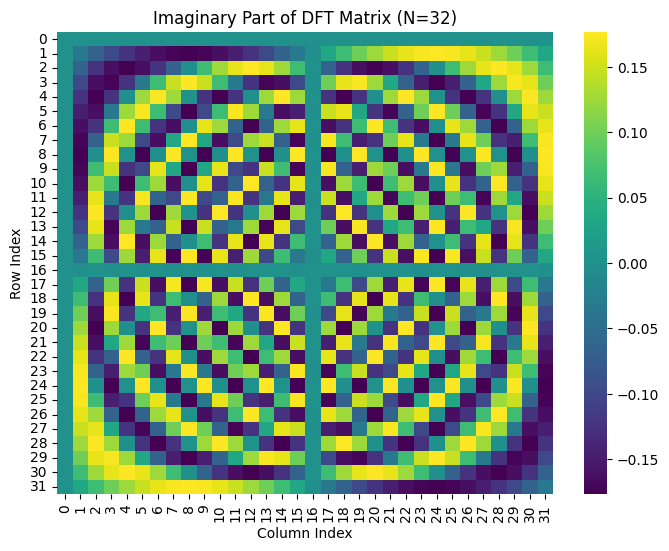

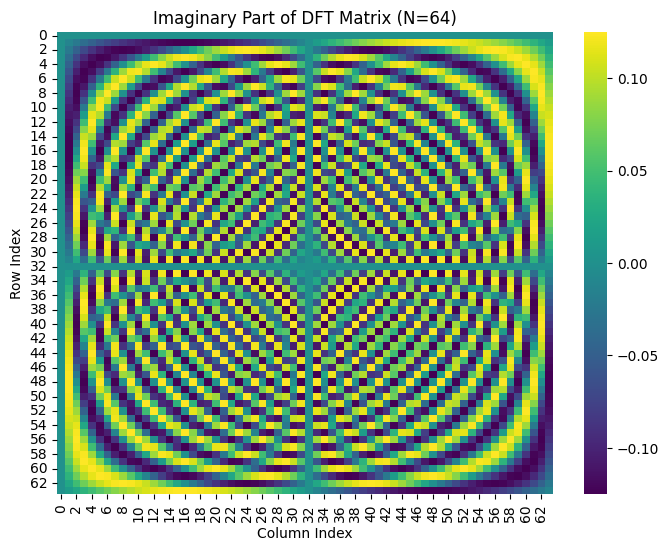

In [49]:
for N_val in N_values_explore:

    # Visualize the imaginary part of the DFT matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(dft_matrices[N_val].imag, cmap='viridis')
    plt.title(f'Imaginary Part of DFT Matrix (N={N_val})')
    plt.xlabel('Column Index')
    plt.ylabel('Row Index')
    plt.show()



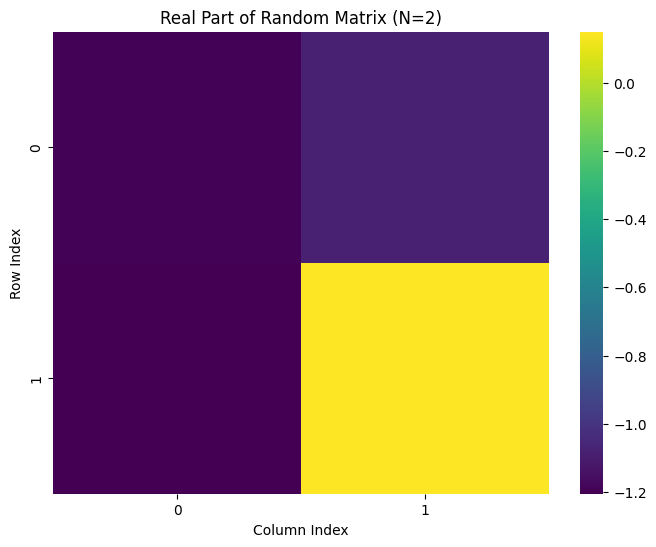

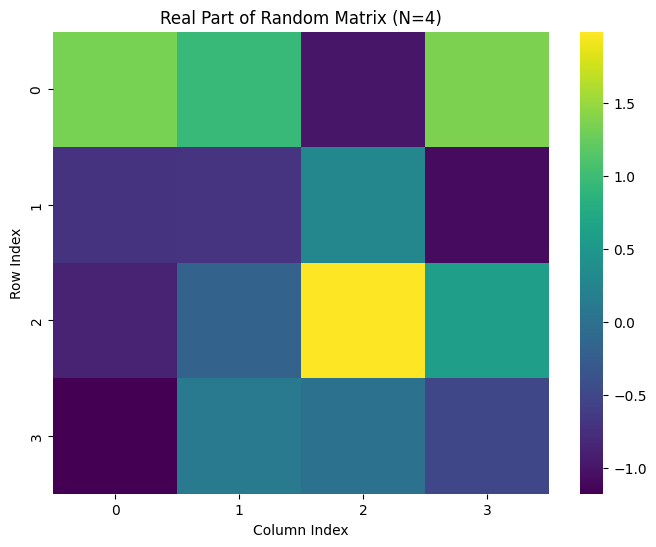

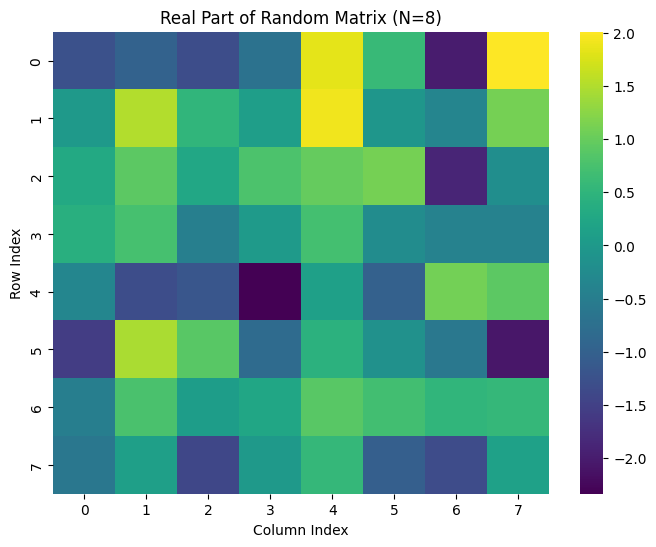

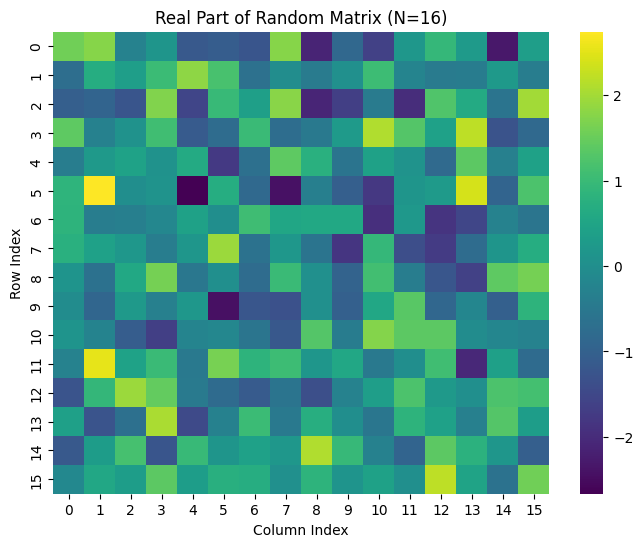

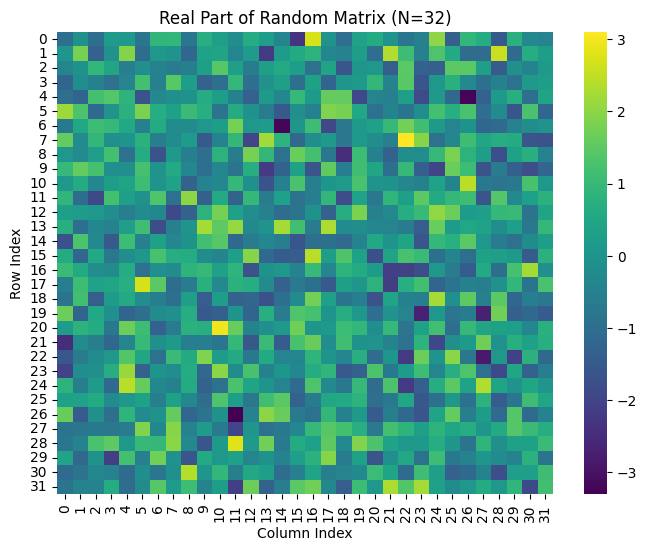

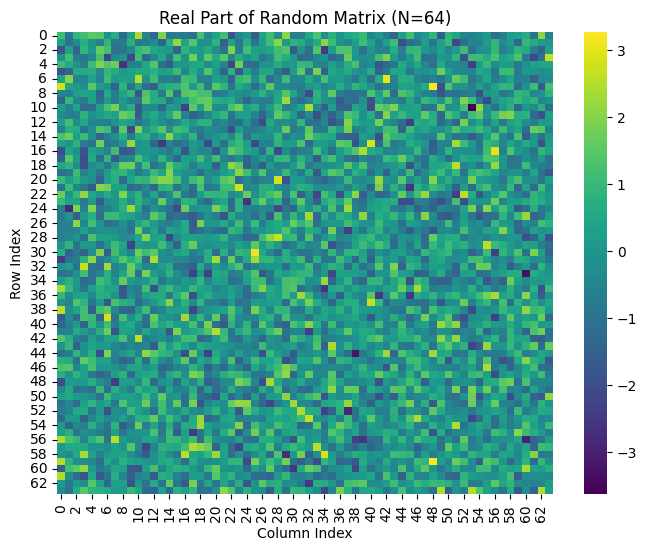

In [50]:
for N_val in N_values_explore:

    # Visualize the real part of the Random matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(random_matrices[N_val].real, cmap='viridis')
    plt.title(f'Real Part of Random Matrix (N={N_val})')
    plt.xlabel('Column Index')
    plt.ylabel('Row Index')
    plt.show()


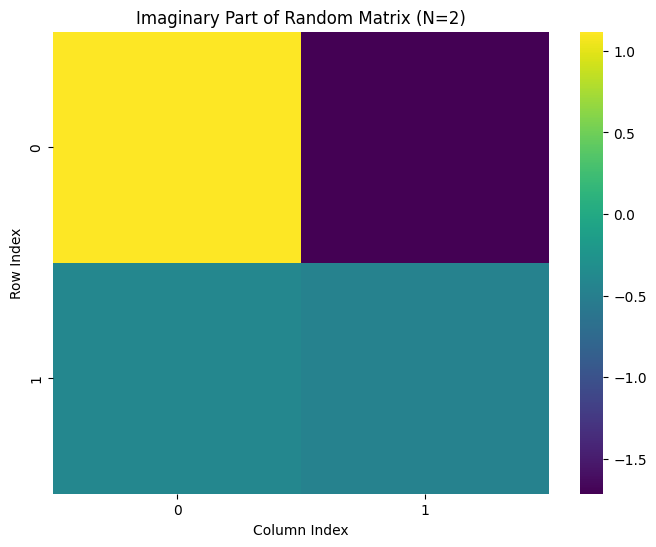

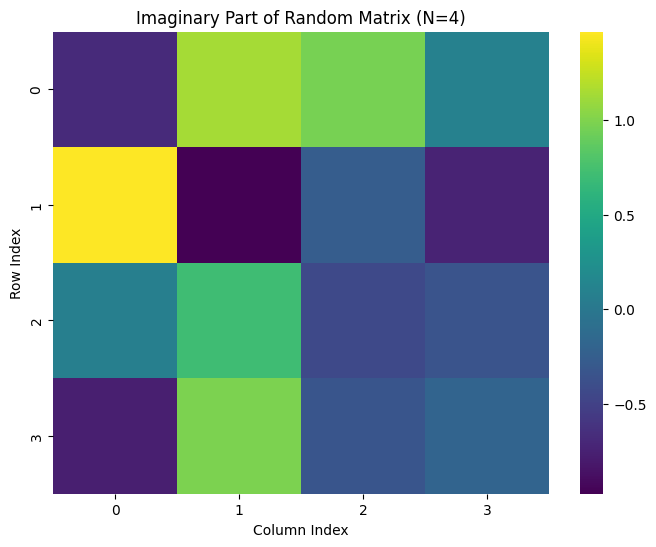

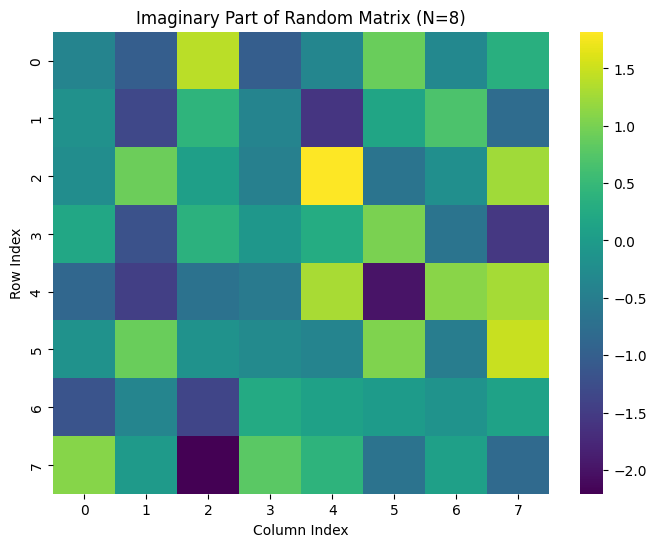

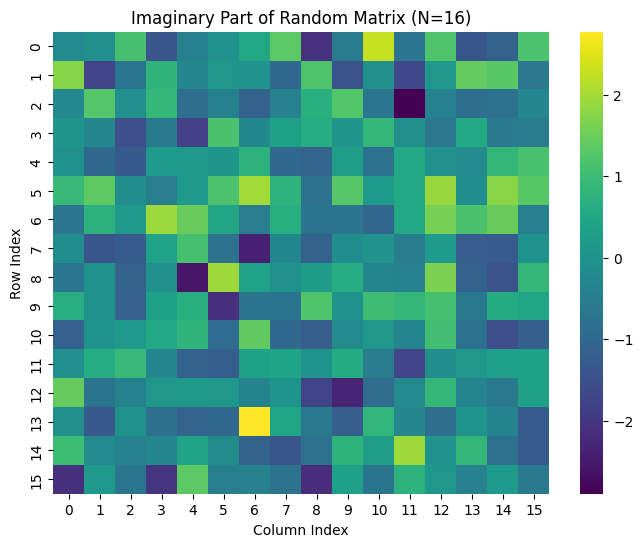

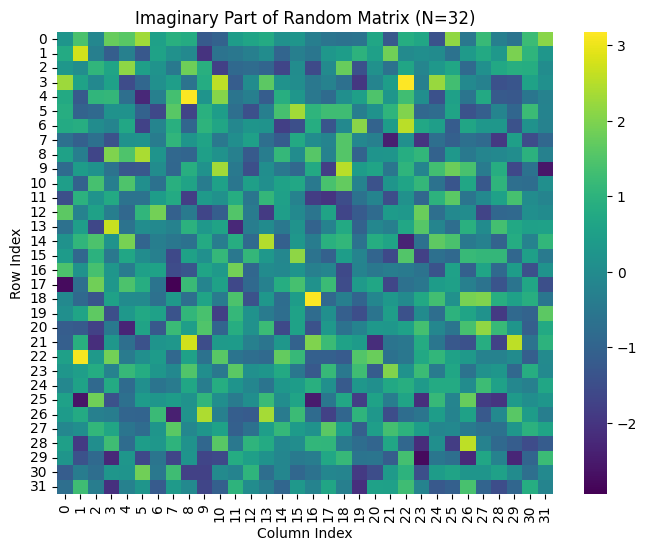

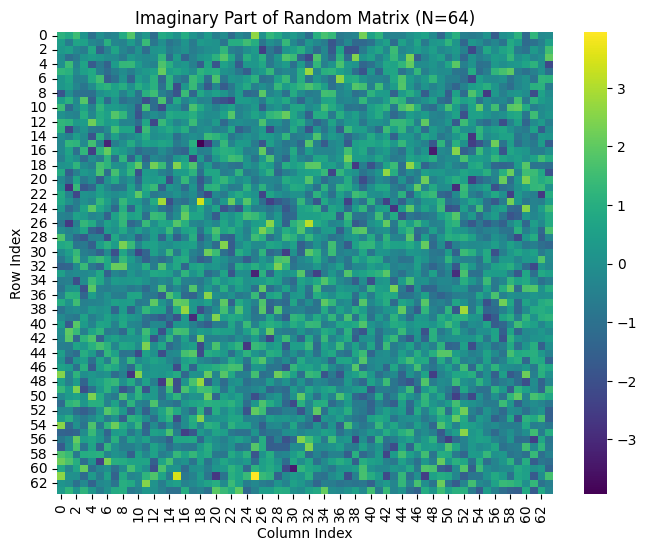

In [51]:
for N_val in N_values_explore:

    # Visualize the imaginary part of the Random matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(random_matrices[N_val].imag, cmap='viridis')
    plt.title(f'Imaginary Part of Random Matrix (N={N_val})')
    plt.xlabel('Column Index')
    plt.ylabel('Row Index')
    plt.show()

 **(ii) Compute the condition numbers κ(FN) and κ(RN) for each N.**

In [52]:
dft_condition_numbers = {}
random_condition_numbers = {}

for N_val in N_values_explore:
    dft_condition_numbers[N_val] = np.linalg.cond(dft_matrices[N_val])
    random_condition_numbers[N_val] = np.linalg.cond(random_matrices[N_val])

print("DFT Matrix Condition Numbers:")
print(dft_condition_numbers)

print("\nRandom Matrix Condition Numbers:")
print(random_condition_numbers)

DFT Matrix Condition Numbers:
{2: np.float64(1.0000000000000002), 4: np.float64(1.0000000000000002), 8: np.float64(1.0000000000000004), 16: np.float64(1.000000000000001), 32: np.float64(1.0000000000000022), 64: np.float64(1.0000000000000036)}

Random Matrix Condition Numbers:
{2: np.float64(4.581808212270833), 4: np.float64(4.652741494432964), 8: np.float64(37.59182208144405), 16: np.float64(26.996841195224192), 32: np.float64(42.96251111807007), 64: np.float64(156.3953784157631)}


**(iii) Plot κ(FN) and κ(RN) as a function of N.**

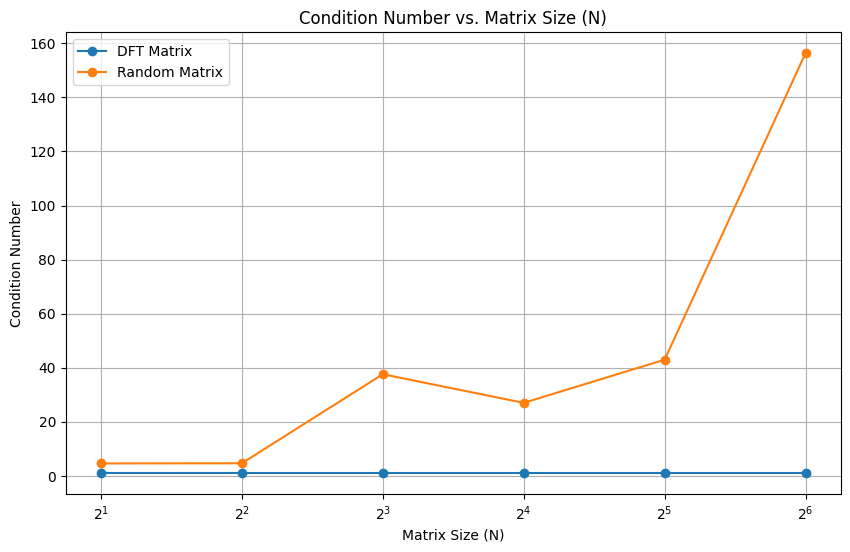

In [54]:
N_values = list(dft_condition_numbers.keys())
dft_conds = list(dft_condition_numbers.values())
random_conds = list(random_condition_numbers.values())

plt.figure(figsize=(10, 6))
plt.plot(N_values, dft_conds, marker='o', linestyle='-', label='DFT Matrix')
plt.plot(N_values, random_conds, marker='o', linestyle='-', label='Random Matrix')

plt.xscale('log', base=2) # Use log scale for N since values are powers of 2
plt.xlabel('Matrix Size (N)')
plt.ylabel('Condition Number')
plt.title('Condition Number vs. Matrix Size (N)')
plt.legend()
plt.grid(True)
plt.show()

**(iv) Comment:**
<br>

**Why the DFT Matrix is Always Well-Conditioned ($\kappa(F_N) = 1$)**

The DFT matrix $F_N$ is theoretically always well-conditioned, with a condition number of 1 (with respect to the 2-norm), because it is a **unitary matrix**.

As we discussed earlier, a unitary matrix $U$ satisfies the property $U^*U = I$, where $U^*$ is the conjugate transpose of $U$ and $I$ is the identity matrix.

The condition number $\kappa(A)$ with respect to the 2-norm is defined as $\|A\|_2 \cdot \|A^{-1}\|_2$.

For a unitary matrix $U$:
*   Its 2-norm is $\|U\|_2 = 1$. This means that applying a unitary transformation does not scale the length of vectors.
*   Its inverse is equal to its conjugate transpose, $U^{-1} = U^*$.
*   The 2-norm of the conjugate transpose is also 1: $\|U^*\|_2 = 1$.

Therefore, the condition number of a unitary matrix $U$ is:
$$
\kappa(U) = \|U\|_2 \cdot \|U^{-1}\|_2 = \|U\|_2 \cdot \|U^*\|_2 = 1 \cdot 1 = 1
$$

A condition number of 1 is the smallest possible condition number for a matrix and indicates perfect conditioning. This means that solving a linear system with a unitary matrix ($Fx = b$) is not susceptible to amplification of errors in the input vector $b$. In the context of the DFT, this implies that the process of transforming a signal to the frequency domain (or vice versa) is numerically stable and does not magnify noise or errors present in the original signal or coefficients. This well-conditioned nature is a significant advantage of using the DFT in signal processing and numerical analysis.
<br>
<br>


**Why Random Matrices' Condition Numbers Vary and Typically Grow with N**

Unlike the highly structured and unitary DFT matrix, random matrices lack these specific properties. Their entries are drawn independently from a probability distribution (in this case, i.i.d. from N(0,1)). This randomness is the key reason why their condition numbers behave differently and typically grow with the matrix size N.

Here's why:

*   **Lack of Structure:** Random matrices generally do not possess the inherent symmetries, orthogonality, or other properties that guarantee a low condition number like unitary matrices do.

*   **Increased Likelihood of Near-Linear Dependence:** As the size of a random matrix (N) increases, the probability that its columns (or rows) become nearly linearly dependent increases. Linear dependence (or near-linear dependence) among the columns of a matrix makes the matrix nearly singular (non-invertible), which leads to a large condition number. Intuitively, with more random vectors in a higher-dimensional space, it becomes more likely that some combination of these vectors can closely approximate another vector, indicating near-linear dependence.

*   **Eigenvalue/Singular Value Distribution:** For large random matrices, the distribution of their eigenvalues or singular values follows certain patterns (e.g., Wigner's semicircle law for eigenvalues of symmetric random matrices). These distributions often include values close to zero as N increases, which contributes to a larger condition number ($\kappa(A) = \sigma_{\text{max}} / \sigma_{\text{min}}$, where $\sigma_{\text{min}}$ is the smallest singular value). A singular value close to zero means the matrix is close to being singular.

In summary, the variability and growth of condition numbers in random matrices with increasing N stem from the increasing probability of near-linear dependence among their columns due to the lack of deterministic structure, which makes the matrix closer to being singular and thus more sensitive to input perturbations in solving linear systems.
<br>
<br>

**Implications for Numerical Stability**

The condition number of a matrix has significant implications for the numerical stability of operations involving that matrix, particularly in solving linear systems ($Ax=b$) and inverting transforms.

*   **Well-Conditioned Matrices (like the DFT Matrix):**
    *   A condition number close to 1 (as seen with the DFT matrix) indicates a well-conditioned matrix.
    *   This means that small errors or perturbations in the input vector \(b\) (or in the matrix \(A\) itself) will result in only small, proportional changes in the solution vector \(x\).
    *   In the context of the DFT, this is crucial. When we transform a signal to the frequency domain or transform frequency coefficients back to the time domain, the operation is numerically stable. Noise or small inaccuracies in the signal samples or the computed coefficients will not be drastically amplified in the result. This reliable behavior is essential for accurate signal processing.

*   **Ill-Conditioned Matrices (like typical Random Matrices as N grows):**
    *   A large condition number (as seen with the random matrices, especially for larger N) indicates an ill-conditioned matrix.
    *   For ill-conditioned matrices, small errors or perturbations in the input vector \(b\) can lead to very large changes in the solution vector \(x\).
    *   Solving a linear system with an ill-conditioned matrix is numerically unstable. The computed solution can be highly inaccurate due to the amplification of small errors introduced during the computation (e.g., floating-point errors).
    *   While we didn't solve linear systems with the random matrices here, their high condition numbers suggest that if they were used in such computations, the results would be very sensitive to small perturbations, making them less reliable for numerical tasks compared to well-conditioned matrices like the DFT matrix.

In summary, the low condition number of the DFT matrix guarantees numerical stability in applications like the forward and inverse DFT. This is a key advantage that deterministic, structured matrices like the DFT matrix hold over general random matrices, whose increasing condition numbers with size can lead to numerical instability in linear algebraic operations.

# (d) Bonus Where might random matrices still be useful (hint: compressed sensing, random projections)?

While random matrices can be ill-conditioned and thus problematic for solving general linear systems, they are surprisingly useful in several areas, particularly in modern signal processing and data analysis techniques. Two notable examples are:

*   **Compressed Sensing:** In compressed sensing, the goal is to acquire and reconstruct sparse signals using far fewer measurements than traditionally required by the Nyquist-Shannon sampling theorem. Random matrices play a crucial role as the "measurement matrix." When a sparse signal is projected onto a lower-dimensional space using a random matrix, the structure of the signal's information is largely preserved. This allows for accurate reconstruction of the original sparse signal from the compressed measurements, despite the apparent information loss. The "randomness" of the matrix ensures that it is largely incoherent with the sparsity basis of the signal, which is a key requirement for successful compressed sensing.

*   **Random Projections:** Random projections are a dimensionality reduction technique. Instead of using complex methods like Principal Component Analysis (PCA), which can be computationally expensive for very high-dimensional data, random matrices can be used to project high-dimensional data onto a lower-dimensional space. The Johnson-Lindenstrauss lemma provides a theoretical basis for this, stating that a set of points in a high-dimensional space can be embedded into a much lower-dimensional space such that the distances between the points are approximately preserved. Random matrices provide a simple and efficient way to achieve these random projections, which are useful in various applications like machine learning, data mining, and nearest neighbor search.

These are just two examples, and random matrices find applications in other areas like randomized algorithms, numerical linear algebra, and theoretical physics. Their utility often arises not from their invertibility or condition number in the traditional sense, but from their ability to preserve certain properties of data or signals under projection or transformation due to their probabilistic nature.